In [12]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [14]:
df = pd.read_csv(r"D:\iml\knn classifier\Classified Data.txt")
df

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1
...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,1.010953,1.034006,0.853116,0.622460,1.036610,0.586240,0.746811,0.319752,1.117340,1.348517,1
996,996,0.575529,0.955786,0.941835,0.792882,1.414277,1.269540,1.055928,0.713193,0.958684,1.663489,0
997,997,1.135470,0.982462,0.781905,0.916738,0.901031,0.884738,0.386802,0.389584,0.919191,1.385504,1
998,998,1.084894,0.861769,0.407158,0.665696,1.608612,0.943859,0.855806,1.061338,1.277456,1.188063,1


In [15]:
#immpression of first look
#1) unamed coolumn not needed 
#2) all the columns look numereic and target class is divided into 2 class 0 and 1 

In [16]:
df.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [17]:
df.tail()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
995,995,1.010953,1.034006,0.853116,0.622460,1.036610,0.586240,0.746811,0.319752,1.117340,1.348517,1
996,996,0.575529,0.955786,0.941835,0.792882,1.414277,1.269540,1.055928,0.713193,0.958684,1.663489,0
997,997,1.135470,0.982462,0.781905,0.916738,0.901031,0.884738,0.386802,0.389584,0.919191,1.385504,1
998,998,1.084894,0.861769,0.407158,0.665696,1.608612,0.943859,0.855806,1.061338,1.277456,1.188063,1
999,999,0.837460,0.961184,0.417006,0.799784,0.934399,0.424762,0.778234,0.907962,1.257190,1.364837,1


In [19]:
#head and tail impression 
#1) no missing value noticed will check further for missing value
#2)data consist of 1000 records 

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1000 non-null   int64  
 1   WTT           1000 non-null   float64
 2   PTI           1000 non-null   float64
 3   EQW           1000 non-null   float64
 4   SBI           1000 non-null   float64
 5   LQE           1000 non-null   float64
 6   QWG           1000 non-null   float64
 7   FDJ           1000 non-null   float64
 8   PJF           1000 non-null   float64
 9   HQE           1000 non-null   float64
 10  NXJ           1000 non-null   float64
 11  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(2)
memory usage: 93.9 KB


In [22]:
#info
#the data has no object category column and consis only of numeric columns

In [24]:
df.isnull().sum()

Unnamed: 0      0
WTT             0
PTI             0
EQW             0
SBI             0
LQE             0
QWG             0
FDJ             0
PJF             0
HQE             0
NXJ             0
TARGET CLASS    0
dtype: int64

In [26]:
#null impresion
#no null values found 

In [28]:
df.describe()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,499.500000,0.949682,1.114303,0.834127,0.682099,1.032336,0.943534,0.963422,1.071960,1.158251,1.362725,0.50000
std,288.819436,0.289635,0.257085,0.291554,0.229645,0.243413,0.256121,0.255118,0.288982,0.293738,0.204225,0.50025
min,0.000000,0.174412,0.441398,0.170924,0.045027,0.315307,0.262389,0.295228,0.299476,0.365157,0.639693,0.00000
25%,249.750000,0.742358,0.942071,0.615451,0.515010,0.870855,0.761064,0.784407,0.866306,0.934340,1.222623,0.00000
50%,499.500000,0.940475,1.118486,0.813264,0.676835,1.035824,0.941502,0.945333,1.065500,1.165556,1.375368,0.50000
75%,749.250000,1.163295,1.307904,1.028340,0.834317,1.198270,1.123060,1.134852,1.283156,1.383173,1.504832,1.00000
max,999.000000,1.721779,1.833757,1.722725,1.634884,1.650050,1.666902,1.713342,1.785420,1.885690,1.893950,1.00000


In [29]:
#describe impression
#few of the columns might have outlier i will get more better idea cy checking outliear for features 


In [30]:
# data visualization 

<Axes: >

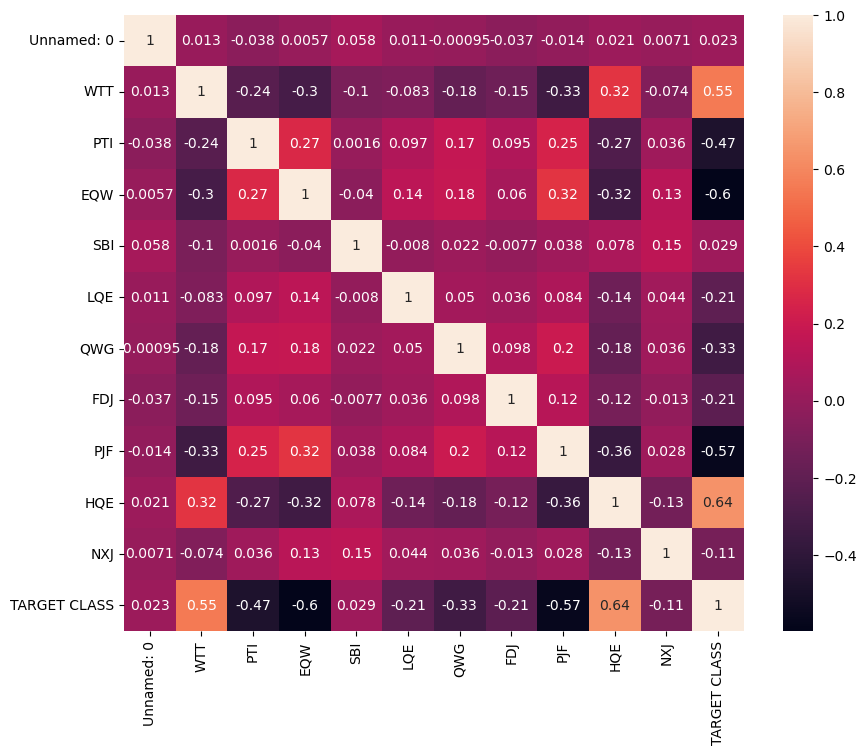

In [32]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

In [33]:
#corr impression 
#cannot see very high corellation between any feature columns so i dont feel there is need of removing any column in preprocessing except unamed 

[Text(0.5, 1.0, 'Box plot for WTT')]

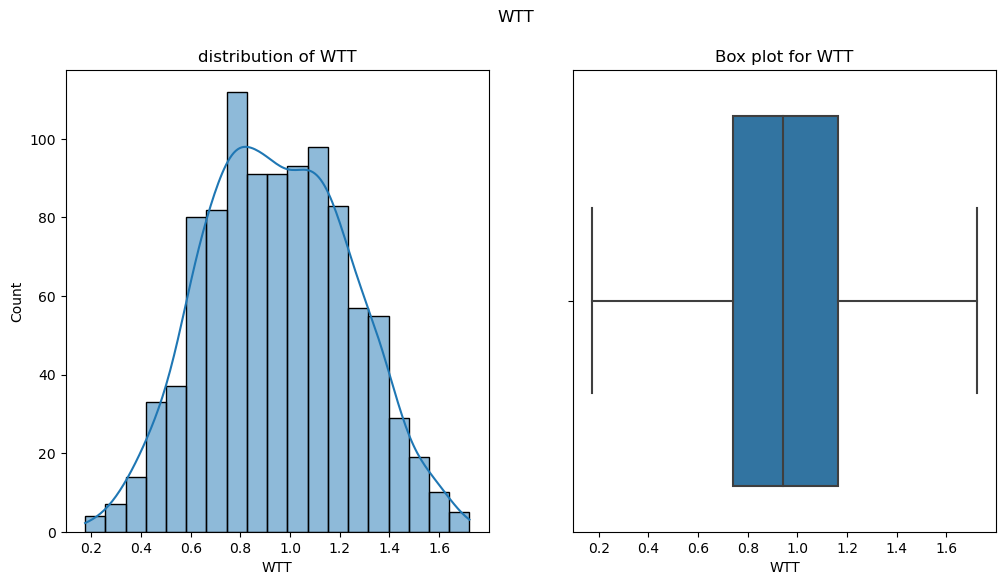

In [34]:
fig,axes=plt.subplots(1,2,figsize=(12,6))
plt.suptitle('WTT')
sns.histplot(data=df,x='WTT',kde=True,ax=axes[0]).set(title='distribution of WTT')
sns.boxplot(data=df,x='WTT').set(title='Box plot for WTT')

[Text(0.5, 1.0, 'boxplot of PTI')]

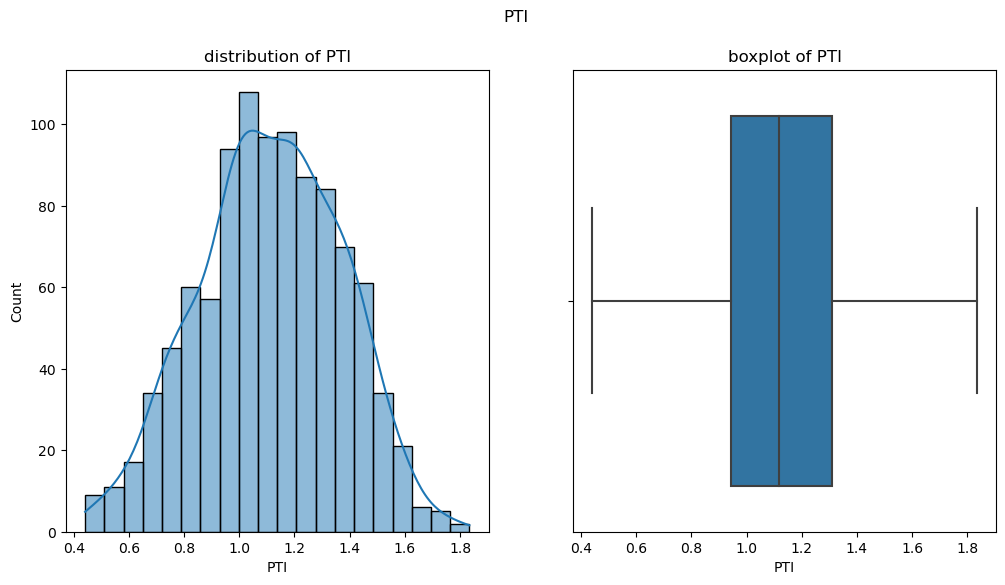

In [36]:
fig, axes = plt.subplots(1,2,figsize =(12,6))
plt.suptitle('PTI')
sns.histplot(data = df, x= 'PTI',kde= True, ax= axes[0]).set(title = 'distribution of PTI')
sns.boxplot(data = df, x = 'PTI').set(title = 'boxplot of PTI')

[Text(0.5, 1.0, 'boxplot of EQW')]

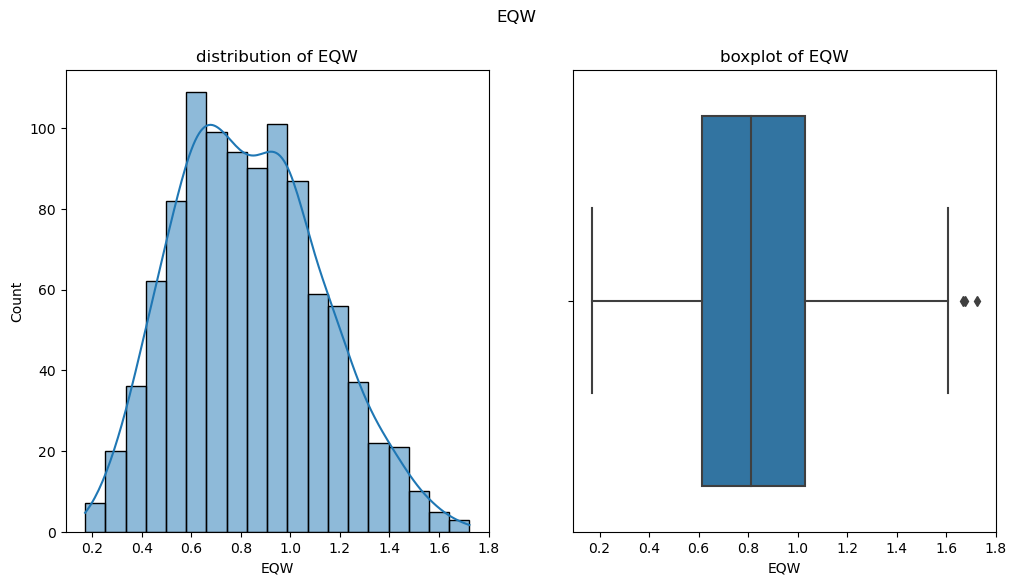

In [40]:
fig, axes= plt.subplots(1,2,figsize=(12,6))
plt.suptitle('EQW')
sns.histplot(data = df, x ='EQW',kde=True, ax= axes[0]).set(title='distribution of EQW')
sns.boxplot(data = df, x ='EQW').set(title='boxplot of EQW')



[Text(0.5, 1.0, 'boxplot of SBI')]

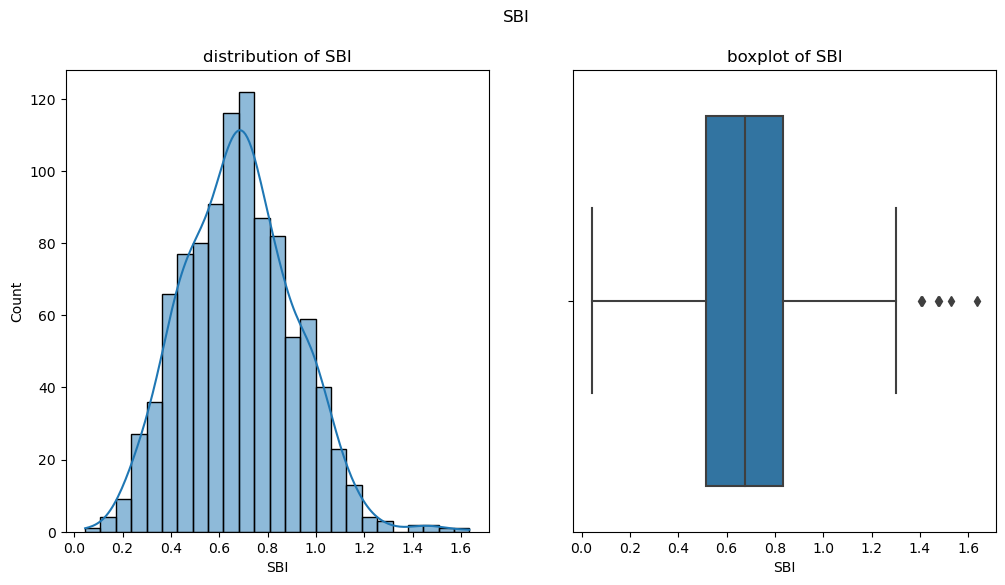

In [42]:
fig, axes = plt.subplots(1,2,figsize =(12,6))
plt.suptitle('SBI')
sns.histplot(data= df, x='SBI', ax= axes[0], kde= True).set(title='distribution of SBI')
sns.boxplot(data = df, x='SBI').set(title = 'boxplot of SBI')

[Text(0.5, 1.0, 'boxplot of LQE')]

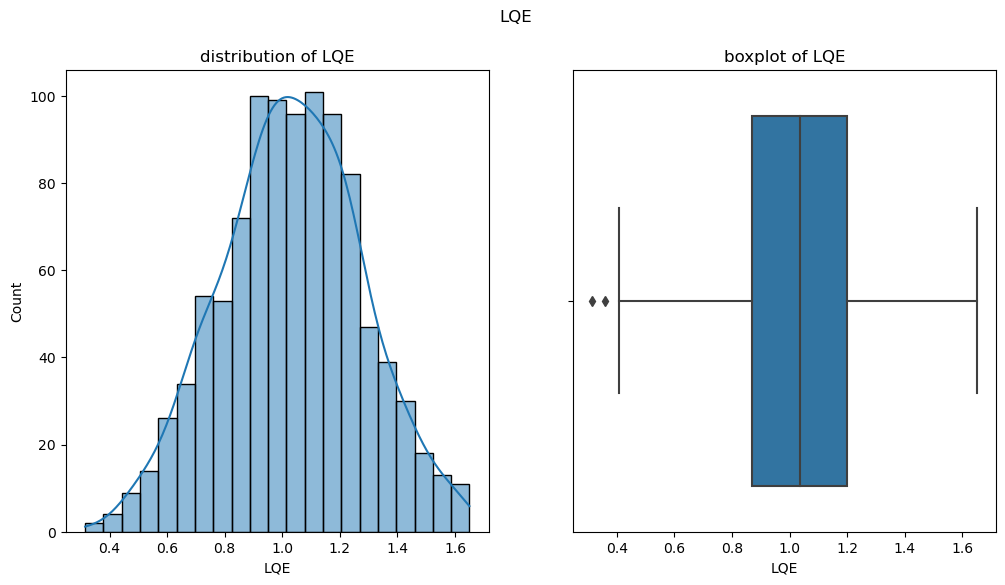

In [43]:
fig, axes = plt.subplots(1,2,figsize= (12,6))
plt.suptitle('LQE')
sns.histplot(data = df, x='LQE', kde =True, ax= axes[0]).set(title ='distribution of LQE')
sns.boxplot(data = df, x='LQE').set(title ='boxplot of LQE')

# preprocessing

In [44]:
df = df.drop("Unnamed: 0", axis=1)

<Axes: >

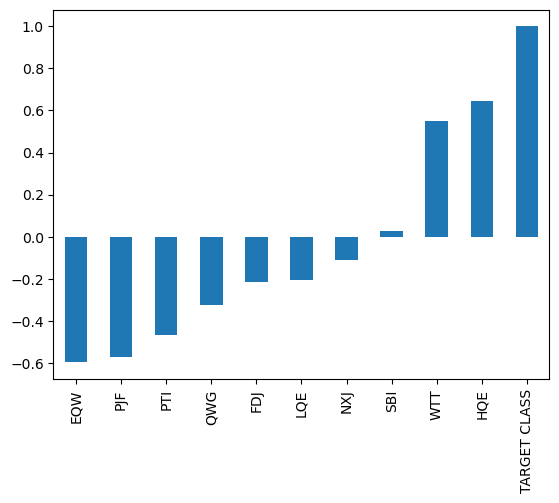

In [45]:
df.corrwith(df["TARGET CLASS"]).sort_values().plot(kind='bar')

In [46]:
X = df.drop('TARGET CLASS', axis=1)

In [48]:
y = df['TARGET CLASS']

<Axes: >

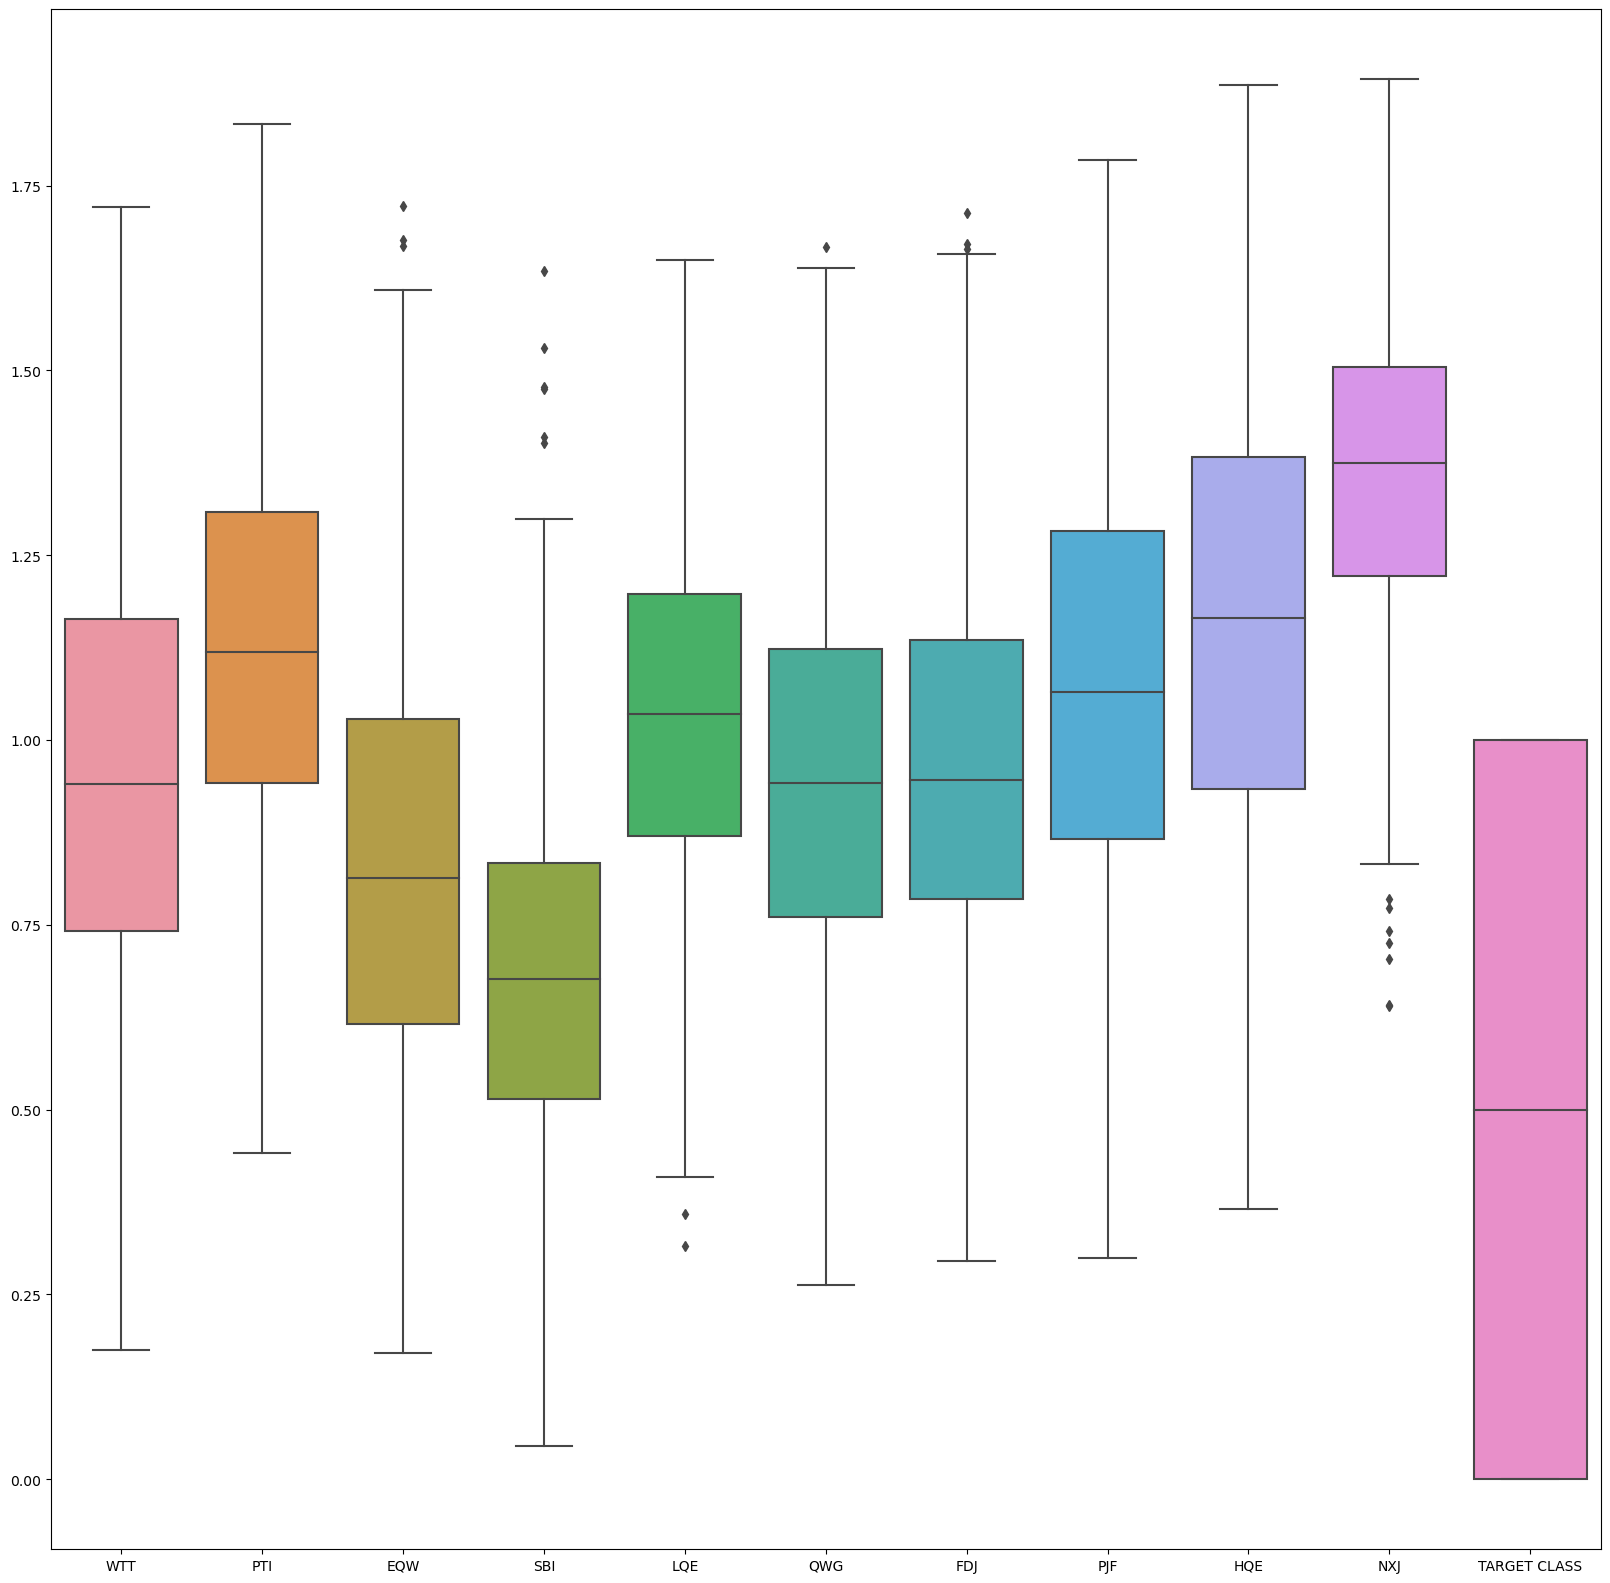

In [49]:
plt.figure(figsize = (20,20))
sns.boxplot(df)

In [50]:
Xnum = df.select_dtypes('number')

In [51]:
#outliear filter 
Q1 = Xnum.quantile(0.25)
Q3 = Xnum.quantile(0.75)
IQR = Q3-Q1
upperb = Q3 + 1.5*IQR
lowerb = Q1 - 1.5*IQR

In [52]:
df = df[~((Xnum<lowerb )|(Xnum>upperb)).any(axis = 1)]

<Axes: >

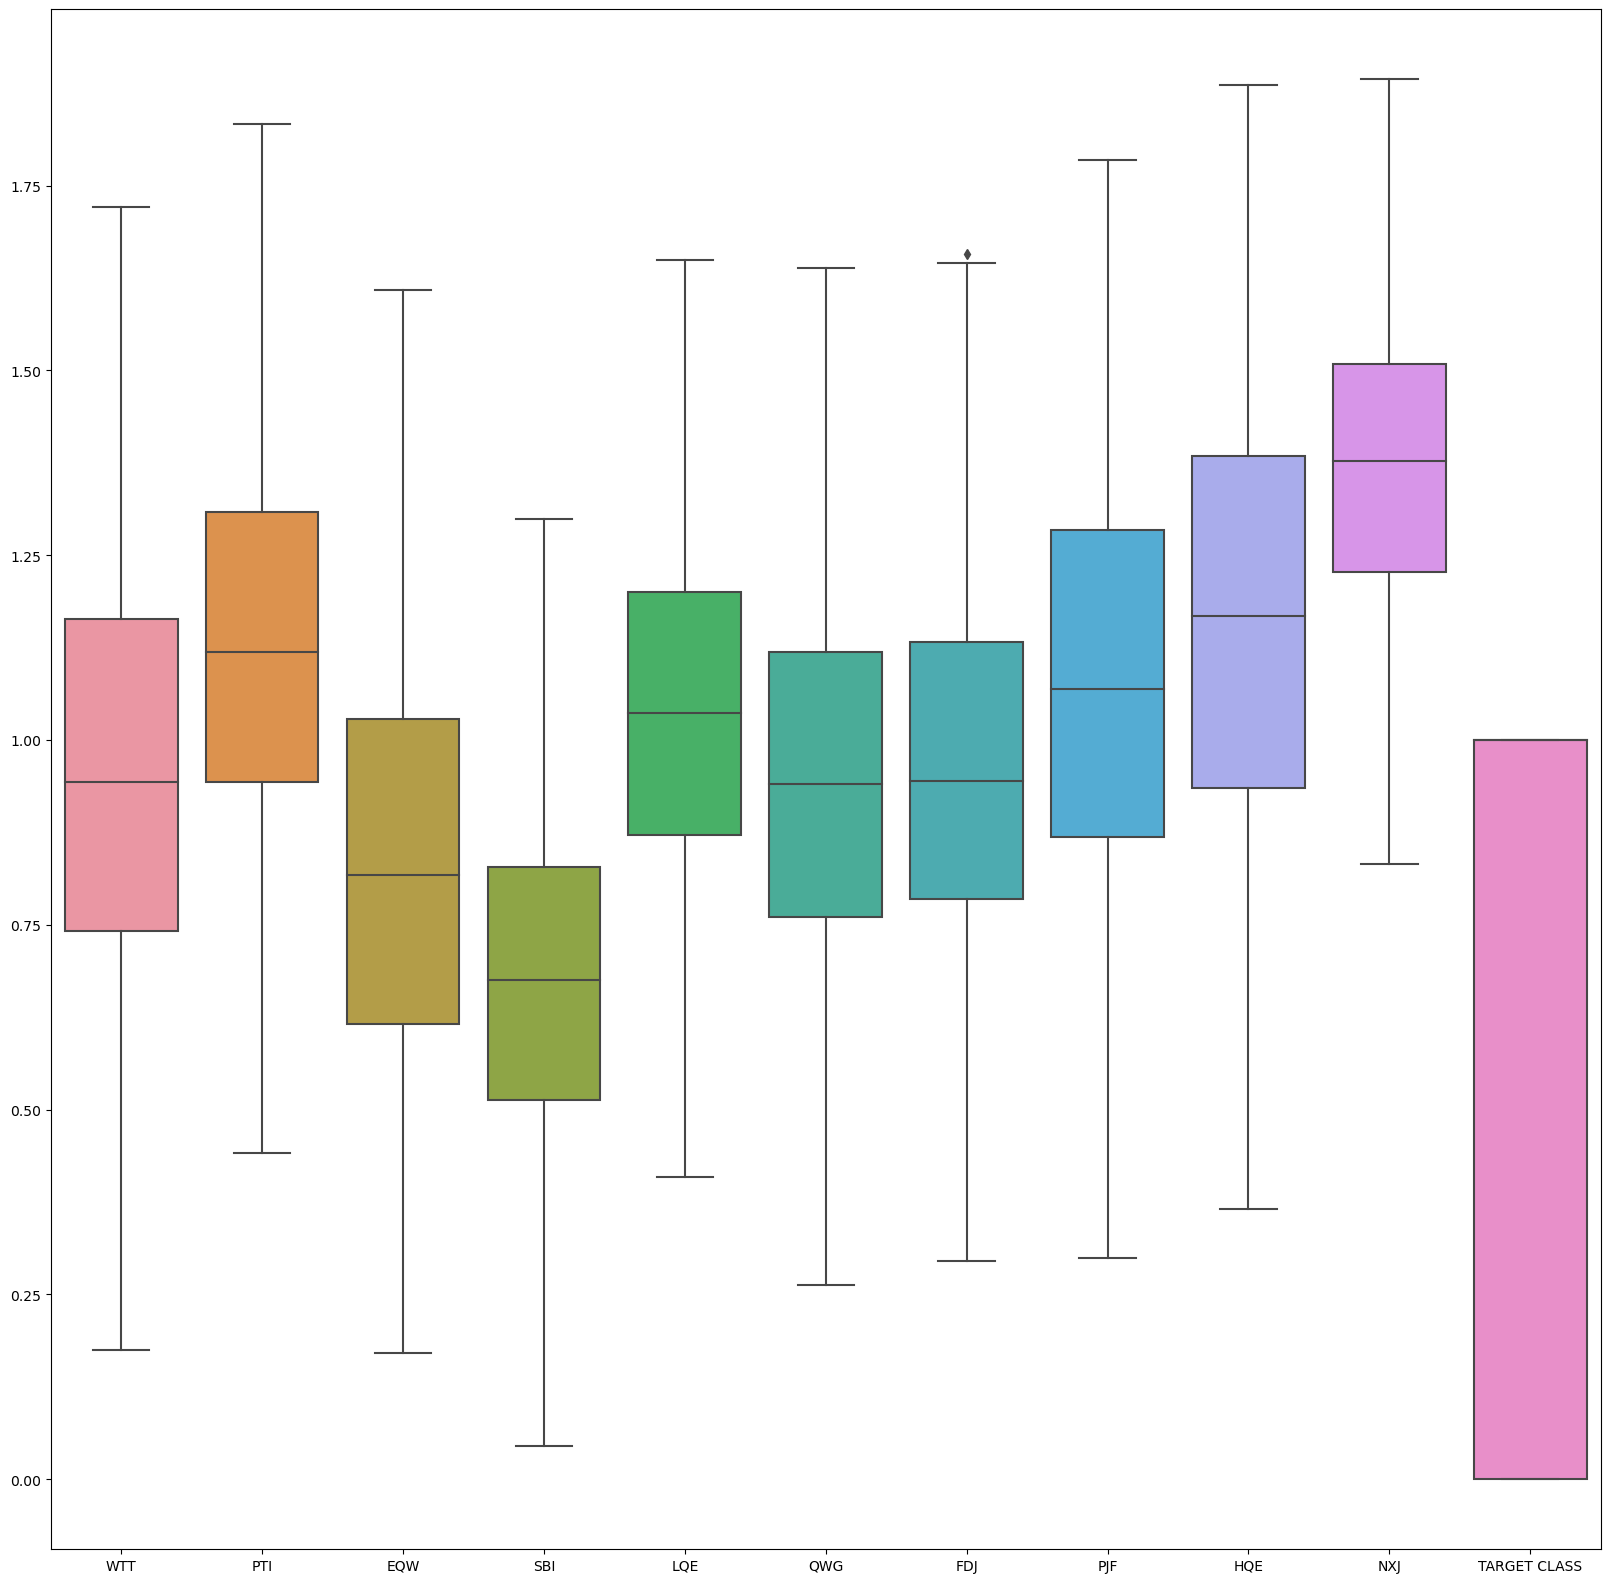

In [53]:
plt.figure(figsize = (20,20))
sns.boxplot(df)

In [58]:
X= df.drop('TARGET CLASS',axis=1)
y=df['TARGET CLASS']


In [60]:
X.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167


In [61]:
y.head()

0    1
1    0
2    0
3    1
4    1
Name: TARGET CLASS, dtype: int64

In [62]:
X_num= X.select_dtypes('number')
X_num

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167
...,...,...,...,...,...,...,...,...,...,...
995,1.010953,1.034006,0.853116,0.622460,1.036610,0.586240,0.746811,0.319752,1.117340,1.348517
996,0.575529,0.955786,0.941835,0.792882,1.414277,1.269540,1.055928,0.713193,0.958684,1.663489
997,1.135470,0.982462,0.781905,0.916738,0.901031,0.884738,0.386802,0.389584,0.919191,1.385504
998,1.084894,0.861769,0.407158,0.665696,1.608612,0.943859,0.855806,1.061338,1.277456,1.188063


In [63]:
scaler = MinMaxScaler()
X_num_scaled = scaler.fit_transform(X_num)

In [70]:
X = pd.DataFrame(X_num_scaled, columns = X_num.columns, index = X_num.index)
X

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,0.477912,0.517593,0.276142,0.566359,0.299697,0.065553,0.340825,0.231719,0.338214,0.375552
1,0.298068,0.403864,0.253465,0.622307,0.415111,0.280513,0.278920,0.480550,0.168622,0.621822
2,0.353470,0.545904,0.522391,0.646183,0.900561,0.333068,0.976771,0.575397,0.389811,0.426624
3,0.684900,0.678940,0.335332,0.622291,0.591071,0.445217,0.817800,0.727165,0.761269,0.301739
4,0.714167,0.365101,0.317411,0.497411,0.663611,0.320677,0.601981,0.233666,0.722546,0.552514
...,...,...,...,...,...,...,...,...,...,...
995,0.540622,0.425615,0.474487,0.460328,0.505753,0.235311,0.331369,0.013646,0.494684,0.485927
996,0.259226,0.369436,0.536194,0.596188,0.810039,0.731797,0.558198,0.278421,0.390341,0.782790
997,0.621092,0.388595,0.424958,0.694926,0.396518,0.452200,0.067196,0.060641,0.364369,0.520787
998,0.588408,0.301913,0.164309,0.494796,0.966614,0.495157,0.411349,0.512713,0.599986,0.334698


In [71]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 42)

In [72]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(782, 10)
(196, 10)
(782,)
(196,)


In [74]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.93      0.90      0.92        94
           1       0.91      0.94      0.93       102

    accuracy                           0.92       196
   macro avg       0.92      0.92      0.92       196
weighted avg       0.92      0.92      0.92       196



In [76]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[85,  9],
       [ 6, 96]], dtype=int64)

In [78]:
#finding best value of k 
error_rate = []

for k in range(1, 41):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error_rate.append(np.mean(y_pred != y_test))

In [79]:
error_rate

[0.07653061224489796,
 0.09183673469387756,
 0.05612244897959184,
 0.04591836734693878,
 0.061224489795918366,
 0.05102040816326531,
 0.05612244897959184,
 0.04081632653061224,
 0.05102040816326531,
 0.04591836734693878,
 0.05102040816326531,
 0.04081632653061224,
 0.04591836734693878,
 0.04081632653061224,
 0.05102040816326531,
 0.05612244897959184,
 0.05612244897959184,
 0.05612244897959184,
 0.05612244897959184,
 0.061224489795918366,
 0.05612244897959184,
 0.05612244897959184,
 0.061224489795918366,
 0.05612244897959184,
 0.061224489795918366,
 0.05612244897959184,
 0.05612244897959184,
 0.05612244897959184,
 0.05612244897959184,
 0.05612244897959184,
 0.05612244897959184,
 0.05612244897959184,
 0.061224489795918366,
 0.05612244897959184,
 0.061224489795918366,
 0.061224489795918366,
 0.0663265306122449,
 0.061224489795918366,
 0.07142857142857142,
 0.0663265306122449]

In [83]:

error_rate = []

for k in range(1, 41):
    print(">>> Checking with K val as {}".format(k))
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error_rate.append(np.mean(y_pred != y_test))
    

>>> Checking with K val as 1
>>> Checking with K val as 2
>>> Checking with K val as 3
>>> Checking with K val as 4
>>> Checking with K val as 5
>>> Checking with K val as 6
>>> Checking with K val as 7
>>> Checking with K val as 8
>>> Checking with K val as 9
>>> Checking with K val as 10
>>> Checking with K val as 11
>>> Checking with K val as 12
>>> Checking with K val as 13
>>> Checking with K val as 14
>>> Checking with K val as 15
>>> Checking with K val as 16
>>> Checking with K val as 17
>>> Checking with K val as 18
>>> Checking with K val as 19
>>> Checking with K val as 20
>>> Checking with K val as 21
>>> Checking with K val as 22
>>> Checking with K val as 23
>>> Checking with K val as 24
>>> Checking with K val as 25
>>> Checking with K val as 26
>>> Checking with K val as 27
>>> Checking with K val as 28
>>> Checking with K val as 29
>>> Checking with K val as 30
>>> Checking with K val as 31
>>> Checking with K val as 32
>>> Checking with K val as 33
>>> Checking with K

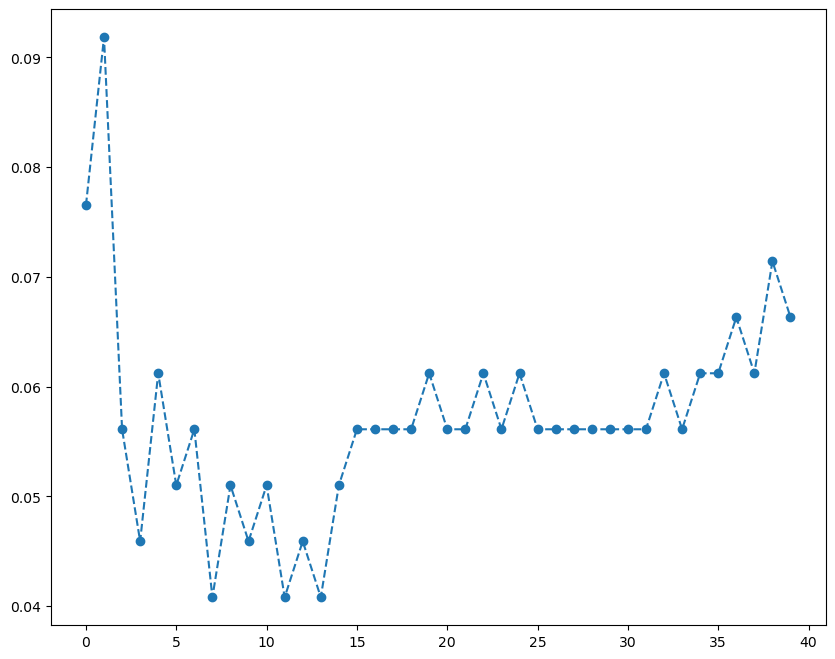

In [95]:
plt.figure(figsize=(10, 8))
plt.plot(error_rate, linestyle="--", marker='o')

In [85]:
knn= KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95        94
           1       0.94      0.97      0.96       102

    accuracy                           0.95       196
   macro avg       0.95      0.95      0.95       196
weighted avg       0.95      0.95      0.95       196



In [91]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


knn = KNeighborsClassifier(n_neighbors=13) 
knn.fit(X_train, y_train)


y_prob = knn.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)






[0.         0.         0.0106383  0.0106383  0.03191489 0.05319149
 0.06382979 0.11702128 0.15957447 0.19148936 0.25531915 0.29787234
 0.43617021 1.        ]


Text(0.5, 1.0, 'Receiver Operating Characteristic (ROC) Curve')

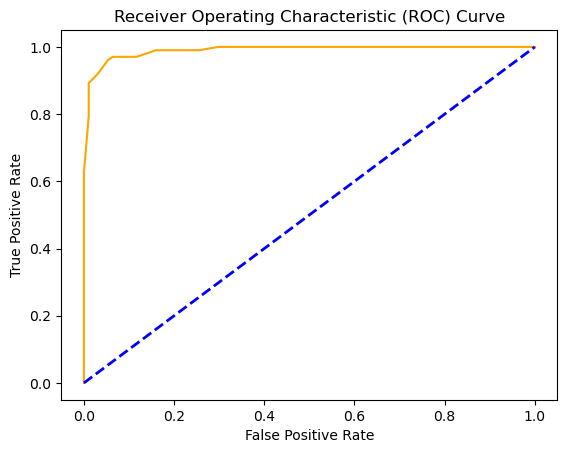

In [104]:
plt.plot(fpr,tpr, color ='orange')
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')